# Valutazione dei modelli

In questo laboratorio vedremo diverse tecniche per valutare un modello e come confrontare diversi modelli di ML per scegliere il migliore.

Useremo un dataset sul churn recuperato da Kaggle

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as st

In [2]:
# Carica il dataset dal file CSV
df = pd.read_csv("https://raw.githubusercontent.com/albayraktaroglu/Datasets/master/churn.csv")

# Visualizza le prime righe del dataset
df.head()

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


Eliminiamo le prime quattro colonne

In [3]:
df.drop(["Phone", "State", "Account Length",	"Area Code"], axis=1, inplace=True)

In [4]:
df.head()

,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


In [5]:
df.dtypes

Int'l Plan         object
VMail Plan         object
VMail Message       int64
Day Mins          float64
Day Calls           int64
Day Charge        float64
Eve Mins          float64
Eve Calls           int64
Eve Charge        float64
Night Mins        float64
Night Calls         int64
Night Charge      float64
Intl Mins         float64
Intl Calls          int64
Intl Charge       float64
CustServ Calls      int64
Churn?             object
dtype: object

Applichiamo il label encoding per convertire le colonne categoriche in numeriche, in quanto è necessario per allenare un modello SVM

In [6]:
from sklearn.preprocessing import LabelEncoder

df["Int'l Plan"] = df["Int'l Plan"].astype("category")
df["VMail Plan"] = df["VMail Plan"].astype("category")
df["Churn?"] = df["Churn?"].astype("category")

# Applica il LabelEncoder alle colonne categoriche
for col in ["Int'l Plan", "VMail Plan", "Churn?"]:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

# Stampa il dataset trasformato
print(df.head())

   Int'l Plan  VMail Plan  VMail Message  Day Mins  Day Calls  Day Charge  \
0           0           1             25     265.1        110       45.07   
1           0           1             26     161.6        123       27.47   
2           0           0              0     243.4        114       41.38   
3           1           0              0     299.4         71       50.90   
4           1           0              0     166.7        113       28.34   

   Eve Mins  Eve Calls  Eve Charge  Night Mins  Night Calls  Night Charge  \
0     197.4         99       16.78       244.7           91         11.01   
1     195.5        103       16.62       254.4          103         11.45   
2     121.2        110       10.30       162.6          104          7.32   
3      61.9         88        5.26       196.9           89          8.86   
4     148.3        122       12.61       186.9          121          8.41   

   Intl Mins  Intl Calls  Intl Charge  CustServ Calls  Churn?  
0       10

In [7]:
df.dtypes

Int'l Plan          int64
VMail Plan          int64
VMail Message       int64
Day Mins          float64
Day Calls           int64
Day Charge        float64
Eve Mins          float64
Eve Calls           int64
Eve Charge        float64
Night Mins        float64
Night Calls         int64
Night Charge      float64
Intl Mins         float64
Intl Calls          int64
Intl Charge       float64
CustServ Calls      int64
Churn?              int64
dtype: object

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df.drop('Churn?', axis=1), df['Churn?'], test_size=0.2, stratify=df['Churn?'], random_state=42)

# Stampa la dimensione dei dati di addestramento e dei dati di test
print('Dimensione dati di addestramento:', X_train.shape)
print('Dimensione dati di test:', X_test.shape)

Dimensione dati di addestramento: (2666, 16)
Dimensione dati di test: (667, 16)


Alleniamo una SVM e calcoliamo le performance

In [9]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pandas as pd

# Addestra la SVM
svm = SVC(random_state=42)
svm.fit(X_train, y_train)

# Valuta il modello utilizzando i dati di test
y_pred = svm.predict(X_test)
accuracy_train_test = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Stampa le prestazioni del modello
print('Accuracy:', accuracy_train_test)
print('Precision:', precision)
print('Recall:', recall)
print('F1-score:', f1)

Accuracy: 0.856071964017991
Precision: 1.0
Recall: 0.010309278350515464
F1-score: 0.020408163265306124


In [10]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_pred, y_test)

array([[570,  96],
       [  0,   1]])

In [11]:
from sklearn.metrics import classification_report

print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       1.00      0.86      0.92       666
           1       0.01      1.00      0.02         1

    accuracy                           0.86       667
   macro avg       0.51      0.93      0.47       667
weighted avg       1.00      0.86      0.92       667


Essendo un problema sbilanciato, l'accuratezza è fuorviante. Bisogna analizzare altre metriche, come precision, recall e f1-score.

Vediamo ora un altro metodo per valutare le performance di un classificatore: la curva ROC.

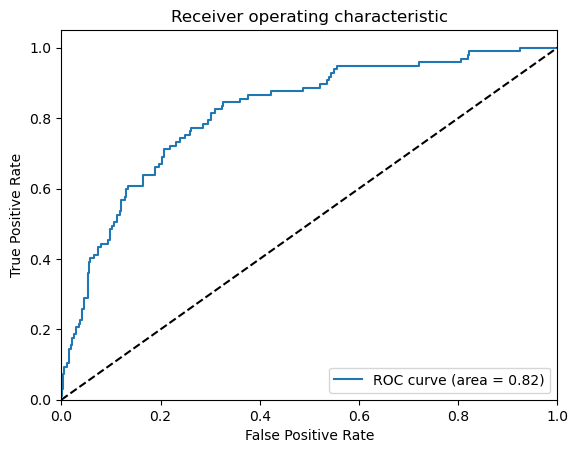

In [12]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Calcola le probabilità di predizione del modello
svm = SVC(kernel='linear', C=1, random_state=42, probability=True)
svm.fit(X_train, y_train)
y_pred_prob = svm.predict_proba(X_test)[:, 1]

# Calcola la curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Calcola l'AUC della curva ROC
roc_auc = roc_auc_score(y_test, y_pred_prob)

# Disegna la curva ROC
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

La curva ROC può essere usata per comparare diversi modelli di ML per capire quale è migliore. Facciamo il training di un albero decisionale e confrontiamo quest'ultimo con l'SVM precedentemente allenato.

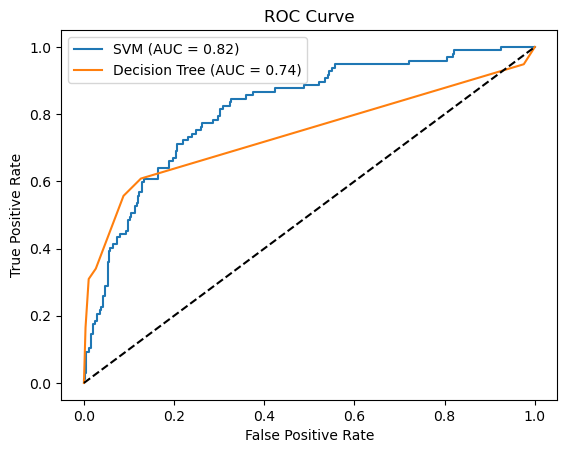

In [13]:
from sklearn.tree import DecisionTreeClassifier

y_svm_pred_prob = y_pred_prob

# Addestra l'albero decisionale
dt = DecisionTreeClassifier(max_depth=3, random_state=42)
dt.fit(X_train, y_train)

# Calcola la curva ROC e l'AUC della SVM
fpr_svm, tpr_svm, thresholds_svm = roc_curve(y_test, y_svm_pred_prob)
auc_svm = roc_auc_score(y_test, y_svm_pred_prob)

# Calcola le probabilità di predizione del modello dell'albero decisionale utilizzando predict_proba
y_dt_pred_prob = dt.predict_proba(X_test)[:, 1]

# Calcola la curva ROC e l'AUC dell'albero decisionale
fpr_dt, tpr_dt, thresholds_dt = roc_curve(y_test, y_dt_pred_prob)
auc_dt = roc_auc_score(y_test, y_dt_pred_prob)

# Plotta la curva ROC dei due modelli per comparare le performance
plt.plot(fpr_svm, tpr_svm, label=f'SVM (AUC = {auc_svm:.2f})')
plt.plot(fpr_dt, tpr_dt, label=f'Decision Tree (AUC = {auc_dt:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

Due o più modelli possono anche essere comparati in termini di tempo impiegato in fase di training.

In [14]:
from time import time

# Addestra la SVM e calcola il tempo di training
start_time = time()
svm = SVC(kernel='linear', C=1, random_state=42)
svm.fit(X_train, y_train)
end_time = time()
svm_training_time = end_time - start_time

# Addestra l'albero decisionale e calcola il tempo di training
start_time = time()
dt = DecisionTreeClassifier(max_depth=3, random_state=42)
dt.fit(X_train, y_train)
end_time = time()
dt_training_time = end_time - start_time

# Stampa il tempo di training dei due modelli
print(f'Tempo di training SVM: {svm_training_time:.2f} secondi')
print(f'Tempo di training Decision Tree: {dt_training_time:.2f} secondi')

Tempo di training SVM: 21.91 secondi
Tempo di training Decision Tree: 0.01 secondi


# 10-fold Cross-Validation

In [15]:
from sklearn.model_selection import KFold,StratifiedKFold

In [16]:
n_fold = 10
folds = KFold(n_splits=n_fold, shuffle=True)

In [17]:
y=df['Churn?']
df = df.drop('Churn?', axis=1)

In [18]:
test_pred_proba = np.zeros((df.shape[0], 2))
accuracy_k_fold = []

for n_fold, (train_idx, valid_idx) in enumerate(folds.split(df, y)):
        X_train, X_valid = df.iloc[train_idx], df.iloc[valid_idx]
        y_train, y_valid = y[train_idx], y[valid_idx]

        model = DecisionTreeClassifier(max_depth=3, random_state=42)
        model.fit(X_train, y_train)

        y_pred_valid = model.predict(X_valid)
        accuracy_k_fold.append(accuracy_score(y_valid,y_pred_valid))

In [19]:
accuracy_k_fold

[0.8922155688622755,
 0.8922155688622755,
 0.8832335329341318,
 0.9129129129129129,
 0.8918918918918919,
 0.9039039039039038,
 0.9069069069069069,
 0.8948948948948949,
 0.924924924924925,
 0.9039039039039038]

In [20]:
st.t.interval(confidence=0.90, df=len(accuracy_k_fold)-1, loc=np.mean(accuracy_k_fold), scale=st.sem(accuracy_k_fold))

(0.8935866301252363, 0.9078141718743681)

# Stratified Cross-validation

In [21]:
n_fold = 10
folds = StratifiedKFold(n_splits=n_fold, shuffle=True)

In [22]:
accuracy_stratified = []

for n_fold, (train_idx, valid_idx) in enumerate(folds.split(df, y)):
        X_train, X_valid = df.iloc[train_idx], df.iloc[valid_idx]
        y_train, y_valid = y[train_idx], y[valid_idx]

        model = DecisionTreeClassifier(max_depth=3, random_state=42)
        model.fit(X_train, y_train)

        y_pred_valid = model.predict(X_valid)
        accuracy_stratified.append(accuracy_score(y_valid,y_pred_valid))

In [23]:
accuracy_stratified

[0.9041916167664671,
 0.9041916167664671,
 0.8952095808383234,
 0.8918918918918919,
 0.8948948948948949,
 0.9129129129129129,
 0.8858858858858859,
 0.918918918918919,
 0.9069069069069069,
 0.9129129129129129]

In [24]:
st.t.interval(confidence=0.90, df=len(accuracy_stratified)-1, loc=np.mean(accuracy_stratified), scale=st.sem(accuracy_stratified))

(0.8966500104487191, 0.9089334172903972)

# Leave-One-Out

In [25]:
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score

In [26]:
loocv = LeaveOneOut()
model = DecisionTreeClassifier(max_depth=3, random_state=42)
results = cross_val_score(model, df, y, cv=loocv)

In [27]:
results

array([1., 1., 1., ..., 1., 1., 1.])

In [28]:
results.mean()

0.9042904290429042

# Repeated cv

In [29]:
from sklearn.model_selection import RepeatedKFold

In [30]:
rkf = RepeatedKFold(n_splits=10, n_repeats=5, random_state=42)
rkf.get_n_splits(df, y)

50

In [31]:
accuracy_repeated_cv = []
for n_fold, (train_idx, valid_idx) in enumerate(rkf.split(df, y)):
        X_train, X_valid = df.iloc[train_idx], df.iloc[valid_idx]
        y_train, y_valid = y[train_idx], y[valid_idx]

        model = DecisionTreeClassifier(max_depth=3, random_state=42)
        model.fit(X_train, y_train)

        y_pred_valid = model.predict(X_valid)
        accuracy_repeated_cv.append(accuracy_score(y_valid,y_pred_valid))

In [32]:
accuracy_repeated_cv

[0.8832335329341318,
 0.9041916167664671,
 0.9101796407185628,
 0.8858858858858859,
 0.9039039039039038,
 0.9069069069069069,
 0.9219219219219219,
 0.918918918918919,
 0.8978978978978979,
 0.9009009009009009,
 0.9401197604790419,
 0.8952095808383234,
 0.907185628742515,
 0.9009009009009009,
 0.8558558558558559,
 0.918918918918919,
 0.8858858858858859,
 0.9009009009009009,
 0.93993993993994,
 0.8888888888888888,
 0.9281437125748503,
 0.9101796407185628,
 0.8982035928143712,
 0.8888888888888888,
 0.8948948948948949,
 0.8978978978978979,
 0.9009009009009009,
 0.9009009009009009,
 0.8948948948948949,
 0.8978978978978979,
 0.907185628742515,
 0.8832335329341318,
 0.9161676646706587,
 0.8918918918918919,
 0.9039039039039038,
 0.8828828828828829,
 0.8978978978978979,
 0.9069069069069069,
 0.9039039039039038,
 0.9069069069069069,
 0.9251497005988024,
 0.9041916167664671,
 0.9041916167664671,
 0.8828828828828829,
 0.9099099099099099,
 0.918918918918919,
 0.8708708708708709,
 0.9369369369369369,

In [33]:
# create 95% confidence interval
st.t.interval(confidence=0.90, df=len(accuracy_repeated_cv)-1, loc=np.mean(accuracy_repeated_cv), scale=st.sem(accuracy_repeated_cv))

(0.8984173351526518, 0.9061932634699231)

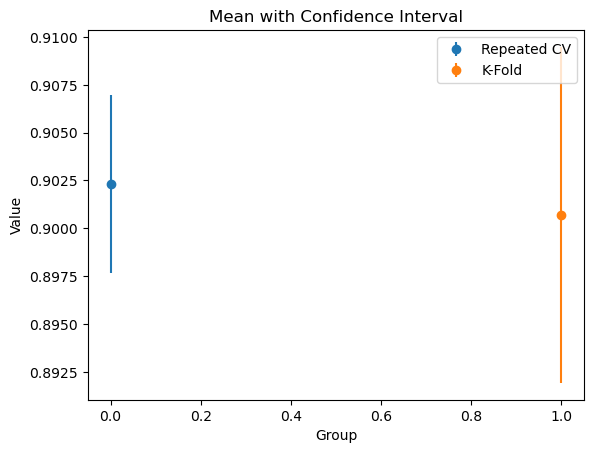

In [34]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Calculate mean and confidence interval on repeated k-fold
mean_value = np.mean(accuracy_repeated_cv)
confidence_interval = stats.t.interval(0.95, len(accuracy_repeated_cv)-1, loc=np.mean(accuracy_repeated_cv), scale=stats.sem(accuracy_repeated_cv))

# Plot the mean and confidence interval
plt.errorbar(0, mean_value, yerr=(confidence_interval[1] - confidence_interval[0])/2, fmt='o', label='Repeated CV')

# Calculate mean and confidence interval on k-fold
mean_value = np.mean(accuracy_k_fold)
confidence_interval = stats.t.interval(0.95, len(accuracy_k_fold)-1, loc=np.mean(accuracy_k_fold), scale=stats.sem(accuracy_k_fold))

# Plot the mean and confidence interval
plt.errorbar(1, mean_value, yerr=(confidence_interval[1] - confidence_interval[0])/2, fmt='o', label='K-Fold')


# Add labels and title
plt.xlabel('Group')
plt.ylabel('Value')
plt.title('Mean with Confidence Interval')

# Show the plot
plt.legend()
plt.show()


# Assignment
Indurre un modello Naive Bayes e confrontarlo con i modelli Decision Tree e SVM in termini di:
- capacità capacità predittive (accuratezza, f-measure, roc, auc)
- tempi di training
- intervalli di confidenza su una misura adeguata